## Paso 1: Carga del conjunto de datos

In [25]:
import pandas as pd

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\028-PROYECTO_FINAL_VIVIENDAS-main\src\csv finales\comunidades_FINAL.csv')

# Mostrar el contenido del dataframe
print(dataframe)


              com. autonoma provincia descripción  precio  habitaciones   m²
0                 Andalucía   Almería      Chalet  179900             3  114
1                 Andalucía   Almería        Piso  210600             3  141
2                 Andalucía   Almería        Piso  210000             4  153
3                 Andalucía   Almería        Piso   83000             2   64
4                 Andalucía   Almería      Chalet  229000             5  150
...                     ...       ...         ...     ...           ...  ...
42067  Comunidad Valenciana  Valencia      Chalet  385000             4  266
42068  Comunidad Valenciana  Valencia        Piso  220000             2   78
42069  Comunidad Valenciana  Valencia        Piso  105000             3  229
42070  Comunidad Valenciana  Valencia        Piso  139000             1   54
42071  Comunidad Valenciana  Valencia      Chalet  790000             6  302

[42072 rows x 6 columns]


## Paso 2: EDA

In [26]:
# Obtener las dimensiones
dataframe.shape

(42072, 6)

El dataframe tiene 42072 filas y 6 columnas.



In [27]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42072 entries, 0 to 42071
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   com. autonoma  42072 non-null  object
 1   provincia      42072 non-null  object
 2   descripción    42072 non-null  object
 3   precio         42072 non-null  int64 
 4   habitaciones   42072 non-null  int64 
 5   m²             42072 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ MB


In [28]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [29]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['com. autonoma', 'provincia', 'descripción']
['precio', 'habitaciones', 'm²']


## duplicados

In [30]:
#ver duplicados

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\028-PROYECTO_FINAL_VIVIENDAS-main\src\csv finales\comunidades_FINAL.csv')

# Verificar duplicados
duplicados = dataframe[dataframe.duplicated()]

if duplicados.empty:
    print("No se encontraron duplicados en el DataFrame.")
else:
    print("Duplicados encontrados:")
    print(duplicados)


Duplicados encontrados:
              com. autonoma provincia descripción   precio  habitaciones   m²
60                Andalucía   Almería      Dúplex   353000             3  188
120               Andalucía   Almería        Piso    79900             3   85
135               Andalucía   Almería        Piso   159500             2   97
151               Andalucía   Almería        Piso    99900             3   93
271               Andalucía     Cádiz        Piso   155000             2   64
...                     ...       ...         ...      ...           ...  ...
41467  Comunidad Valenciana  Valencia        Piso    75000             3   81
41721  Comunidad Valenciana  Valencia        Piso   175000             3   66
41813  Comunidad Valenciana  Valencia      Chalet   390000             4   76
41935  Comunidad Valenciana  Valencia      Chalet  1100000             5   95
41958  Comunidad Valenciana  Valencia      Chalet   280000             4   90

[1181 rows x 6 columns]


In [31]:
# Eliminar duplicados
dataframe_sin_duplicados = dataframe.drop_duplicates()

# Mostrar el contenido del dataframe sin duplicados
print(dataframe_sin_duplicados)

              com. autonoma provincia descripción  precio  habitaciones   m²
0                 Andalucía   Almería      Chalet  179900             3  114
1                 Andalucía   Almería        Piso  210600             3  141
2                 Andalucía   Almería        Piso  210000             4  153
3                 Andalucía   Almería        Piso   83000             2   64
4                 Andalucía   Almería      Chalet  229000             5  150
...                     ...       ...         ...     ...           ...  ...
42067  Comunidad Valenciana  Valencia      Chalet  385000             4  266
42068  Comunidad Valenciana  Valencia        Piso  220000             2   78
42069  Comunidad Valenciana  Valencia        Piso  105000             3  229
42070  Comunidad Valenciana  Valencia        Piso  139000             1   54
42071  Comunidad Valenciana  Valencia      Chalet  790000             6  302

[40891 rows x 6 columns]


## analisis categorico

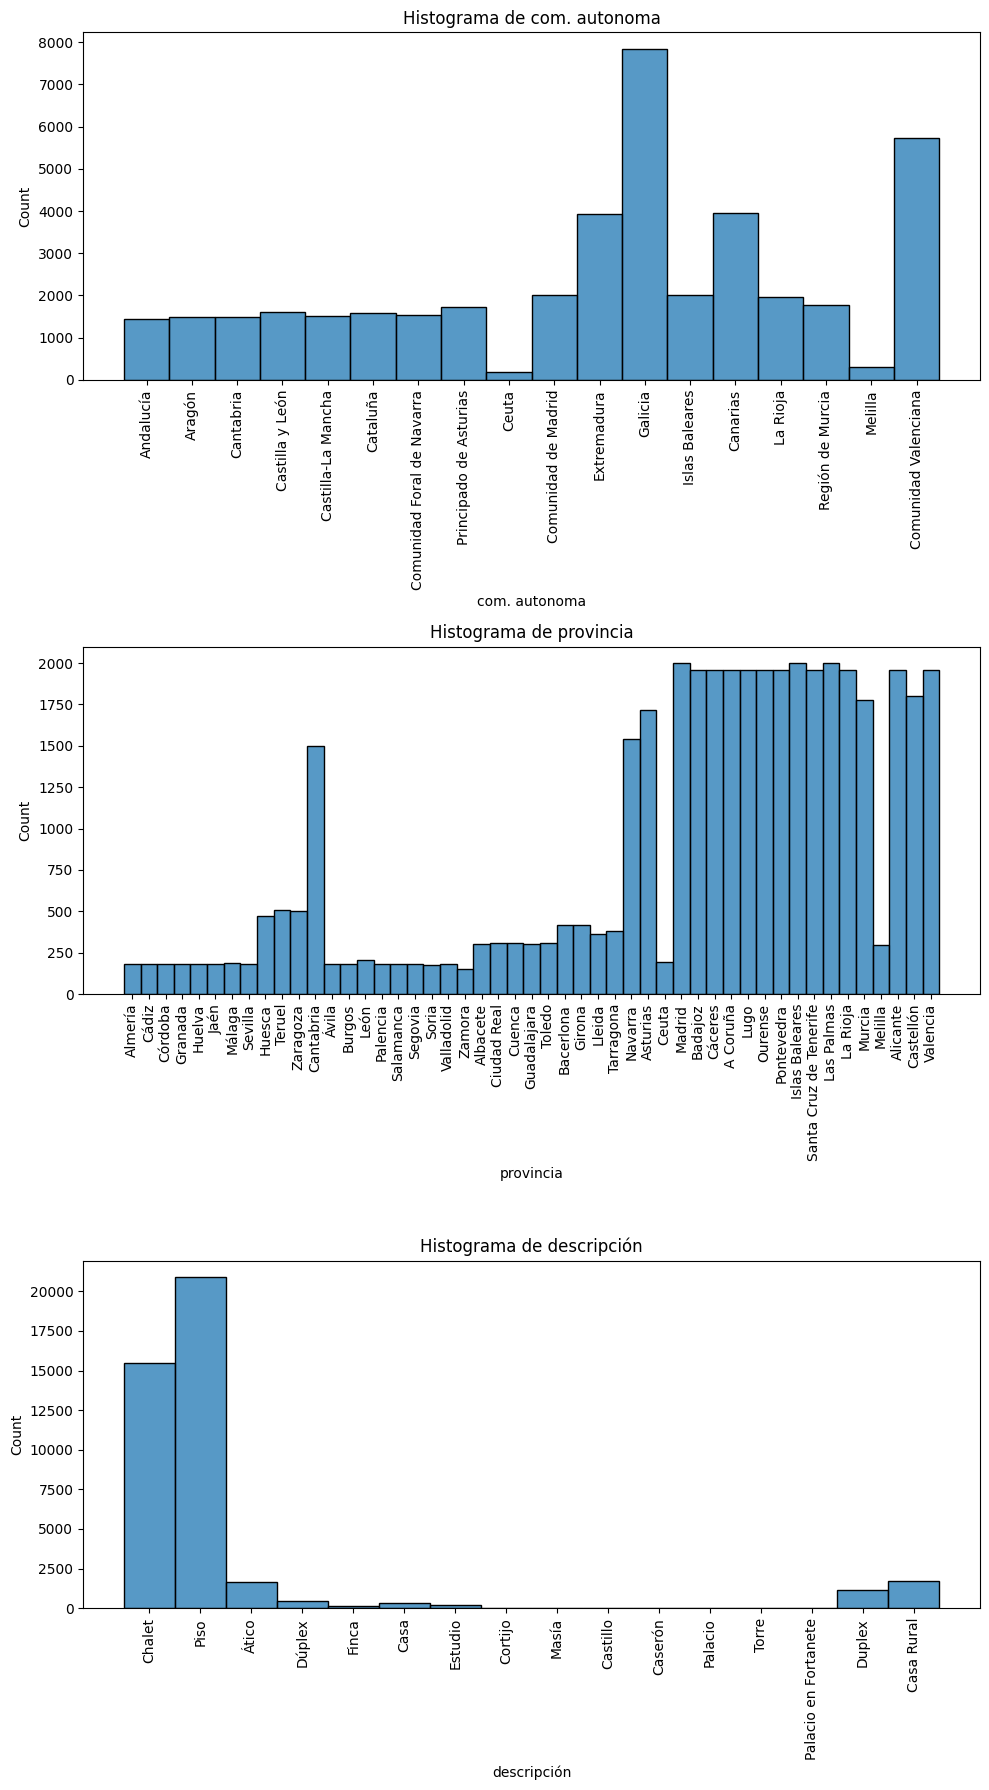

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Crear histograma para 'com. autonoma'
sns.histplot(ax=axes[0], data=dataframe, x='com. autonoma')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Histograma de com. autonoma')

# Crear histograma para 'provincia'
sns.histplot(ax=axes[1], data=dataframe, x='provincia')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Histograma de provincia')

# Crear histograma para 'descripción'
sns.histplot(ax=axes[2], data=dataframe, x='descripción')
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_title('Histograma de descripción')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analisis numerico

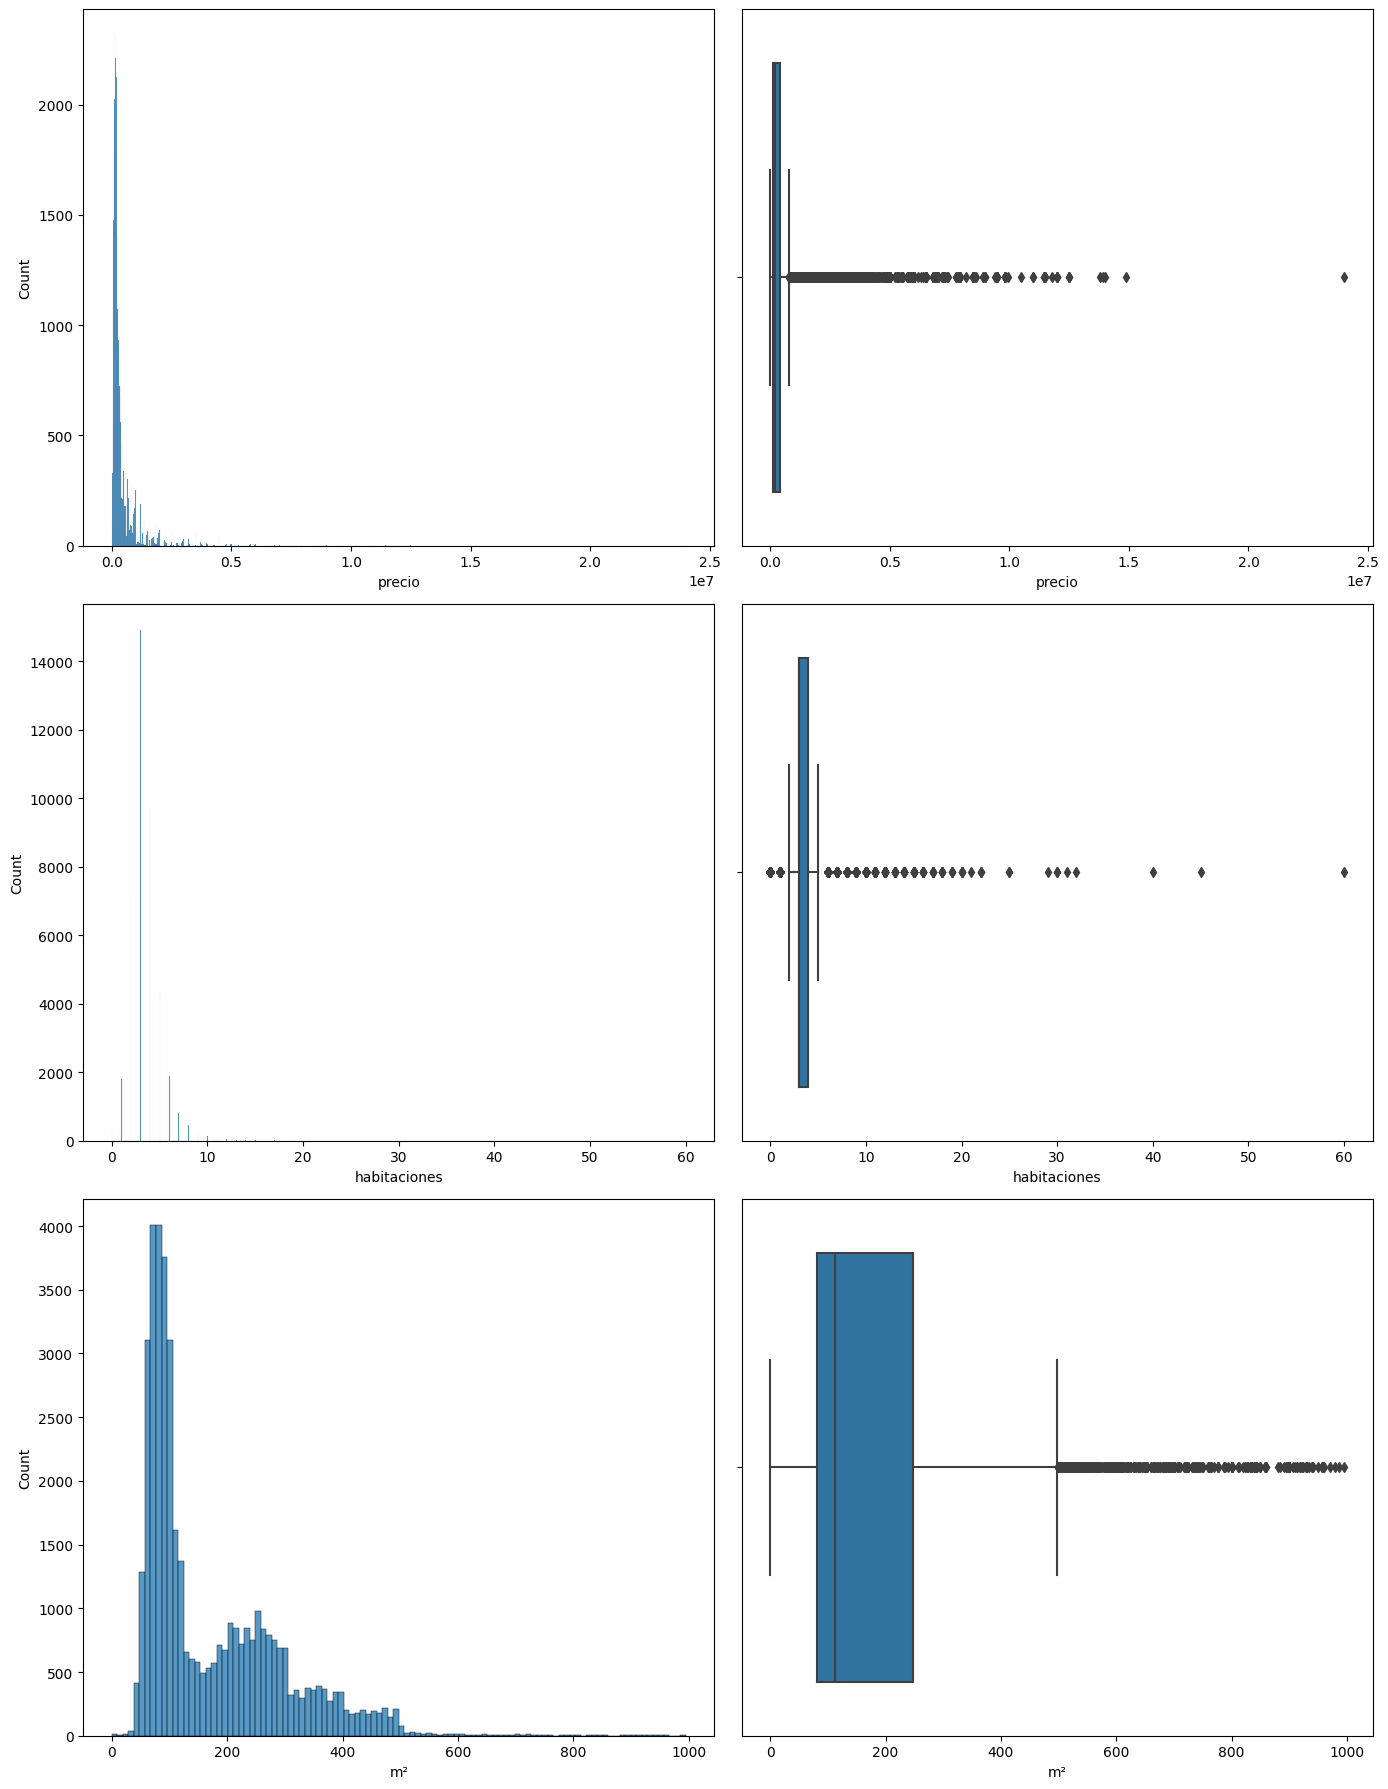

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 3 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(14, 18))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="precio")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="precio")
sns.histplot(ax=axis[1, 0], data=dataframe, x="habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe, x="m²")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="m²")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


## analisis categorico-categorico

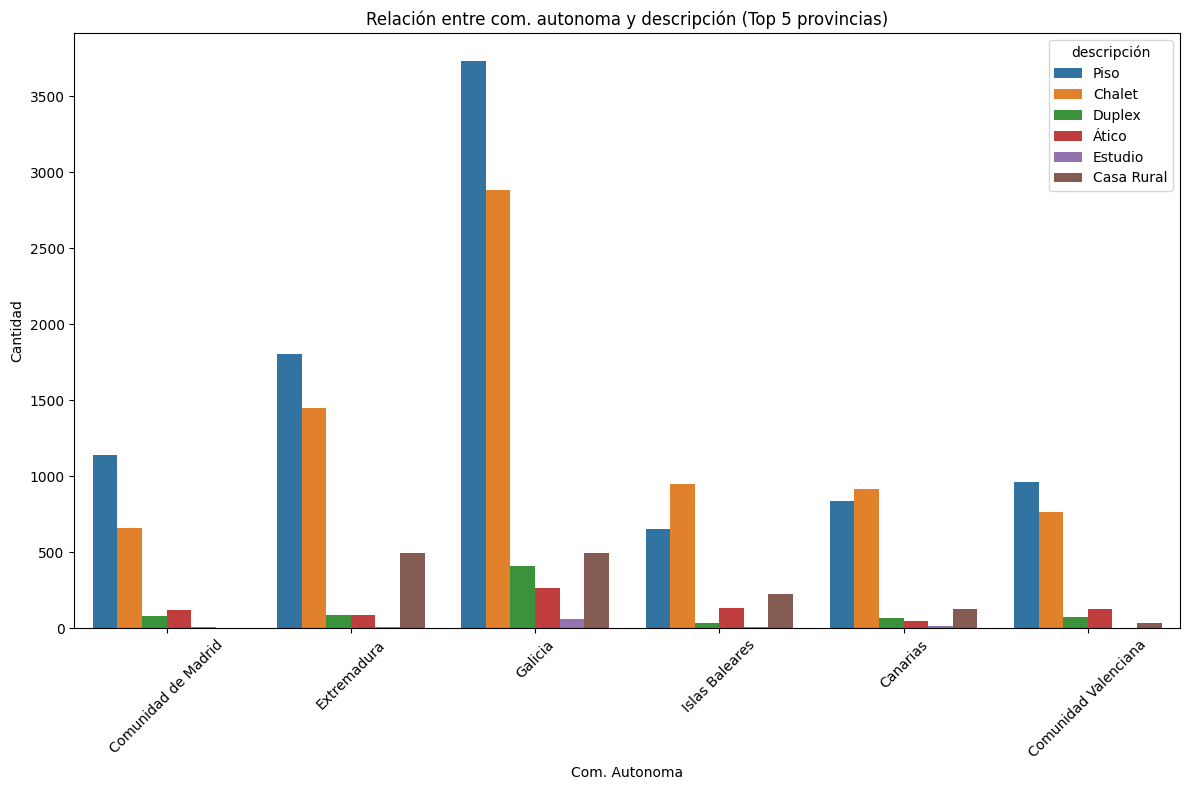

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las 10 provincias más importantes
top_5_provincias = dataframe['descripción'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para las 10 provincias más importantes
dataframe_top_5_provincias = dataframe[dataframe['descripción'].isin(top_5_provincias)]

# Crear una figura de subplots
fig, axes = plt.subplots(figsize=(12, 8))

# Crear un gráfico de barras para analizar 'com. autonoma' vs 'provincia'
sns.countplot(data=dataframe_top_10_provincias, x='com. autonoma', hue='descripción', ax=axes)
axes.set_title('Relación entre com. autonoma y descripción (Top 5 provincias)')
axes.set_xlabel('Com. Autonoma')
axes.set_ylabel('Cantidad')

# Rotar las etiquetas del eje x para mayor legibilidad
axes.tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analisis numerico-numerico

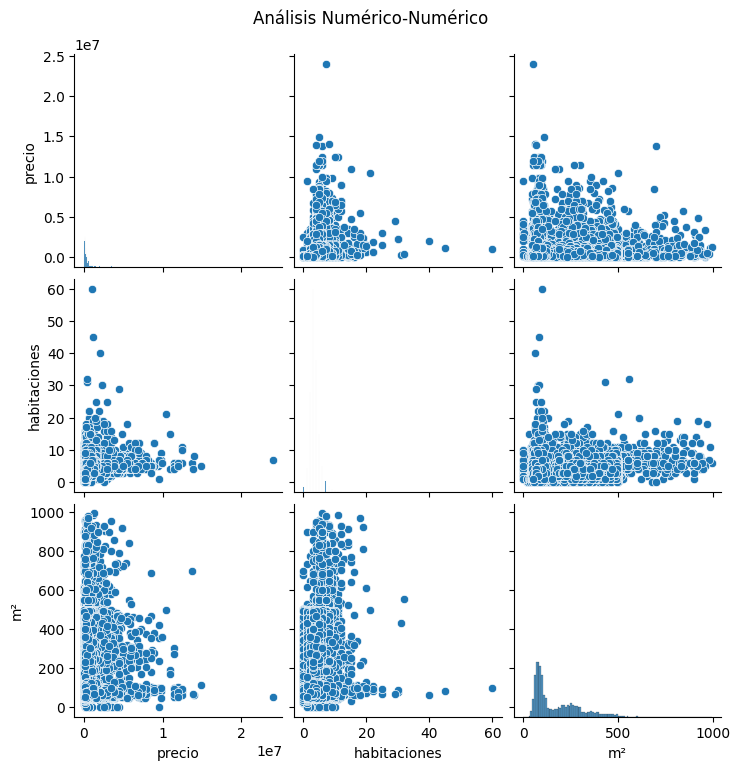

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas para el análisis
numeric_data = dataframe[['precio', 'habitaciones', 'm²']]

# Crear un pairplot para analizar las relaciones entre las variables numéricas
sns.pairplot(numeric_data)
plt.suptitle('Análisis Numérico-Numérico', y=1.02)

# Mostrar el plot
plt.show()


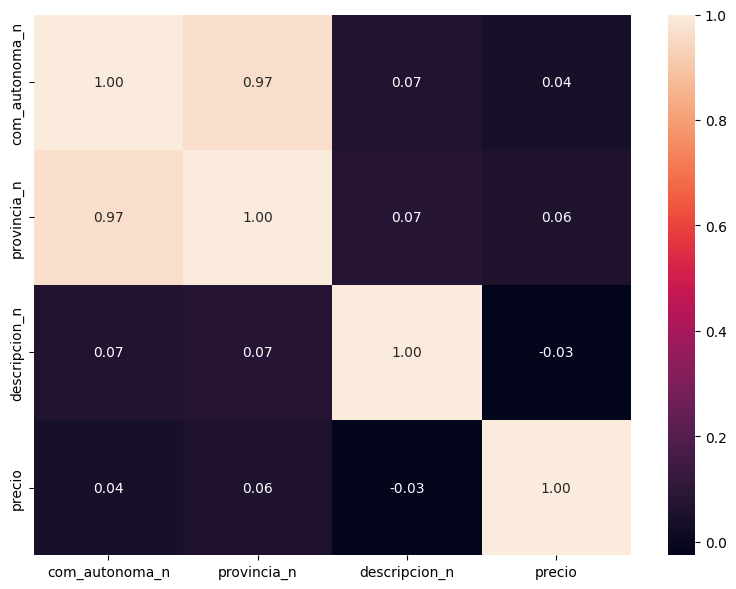

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Convert categorical columns to numerical using factorize
dataframe_copy['com_autonoma_n'] = pd.factorize(dataframe_copy['com. autonoma'])[0]
dataframe_copy['provincia_n'] = pd.factorize(dataframe_copy['provincia'])[0]
dataframe_copy['descripcion_n'] = pd.factorize(dataframe_copy['descripción'])[0]

# Plot the correlation heatmap
fig, axis = plt.subplots(figsize=(8, 6))
sns.heatmap(dataframe_copy[['com_autonoma_n', 'provincia_n', 'descripcion_n', 'precio']].corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()
